<a href="https://colab.research.google.com/github/t-zakharenko/ML-course-May-2025/blob/main/HW_2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C_TZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



**Посилання на файл:**

[Файл process_bank_churn.py на GitHub](https://github.com/t-zakharenko/ML-course-May-2025/blob/main/process_bank_churn.py)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls

drive  process_bank_churn.py  sample_data  test.csv  train.csv


In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
from process_bank_churn import preprocess_data, preprocess_new_data

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# Завантажуємо дані
raw_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [10]:
# Попередня обробка
X_train, y_train, X_val, y_val, input_cols, scaler, encoder = preprocess_data(raw_df)

In [11]:
# Навчання базової моделі
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
# Передбачення й обчислення ROC AUC
train_probs = model.predict_proba(X_train)[:, 1]
val_probs = model.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(y_train, train_probs)
val_auc = roc_auc_score(y_val, val_probs)

print(f"Train AUROC: {train_auc:.4f}")
print(f"Validation AUROC: {val_auc:.4f}")

Train AUROC: 1.0000
Validation AUROC: 0.7641


In [13]:
# Глибина дерева
print("Tree depth:", model.get_depth())

Tree depth: 25


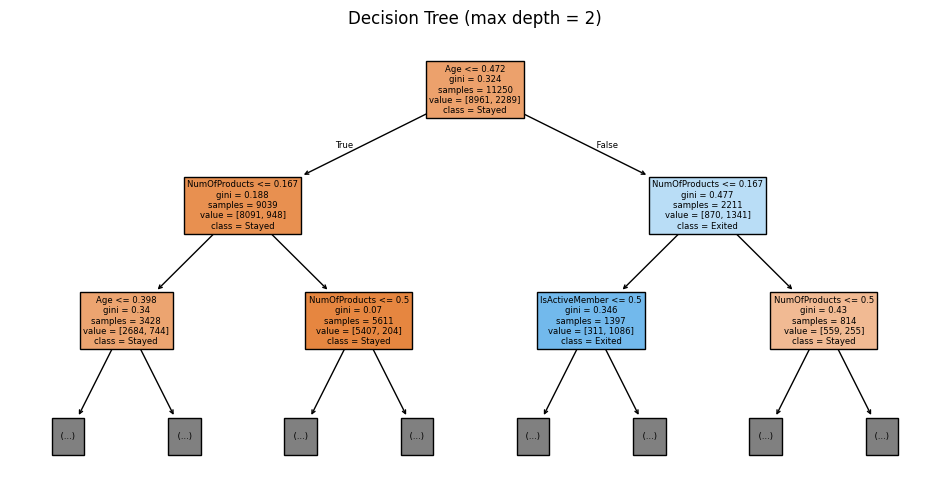

In [14]:
# Візуалізація дерева до глибини 2
plt.figure(figsize=(12, 6))
plot_tree(model, max_depth=2, feature_names=X_train.columns, class_names=["Stayed", "Exited"], filled=True)
plt.title("Decision Tree (max depth = 2)")
plt.show()

In [15]:
# Ознаки — важливість
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

In [16]:
# Топ-10
top_features = importance_df.head(10)
print(top_features)

              feature  importance
2                 Age    0.345497
5       NumOfProducts    0.167947
8     EstimatedSalary    0.131691
0         CreditScore    0.115783
4             Balance    0.083077
3              Tenure    0.063518
7      IsActiveMember    0.033164
1              Gender    0.015994
10  Geography_Germany    0.015137
6           HasCrCard    0.015003


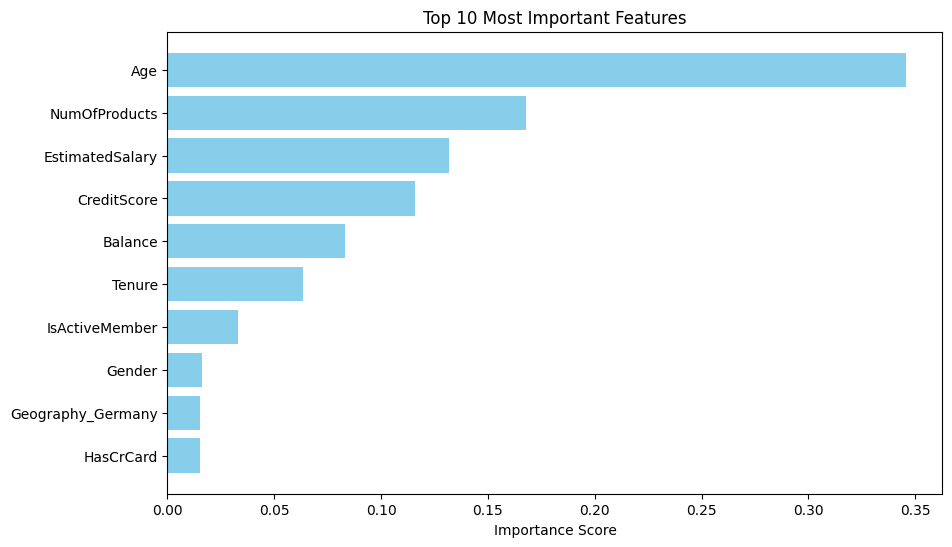

In [17]:
# Barplot
plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.show()

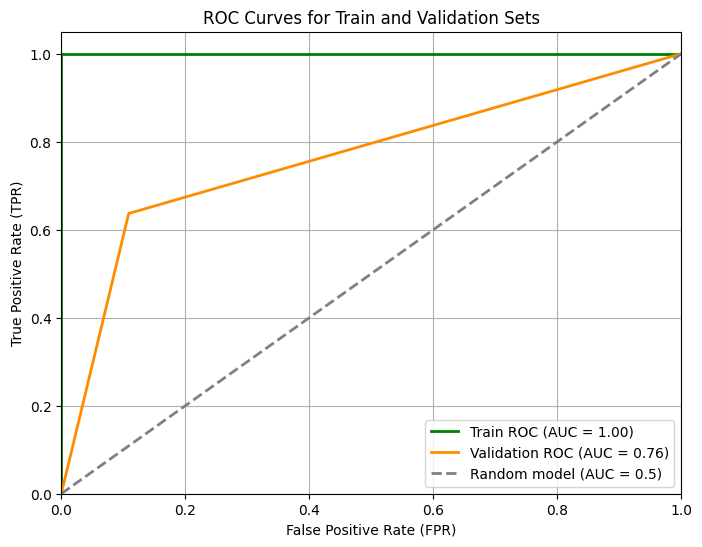

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. ROC для train
fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# 2. ROC для validation
fpr_val, tpr_val, _ = roc_curve(y_val, val_probs)
roc_auc_val = auc(fpr_val, tpr_val)

# 3. Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'Train ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Validation ROC (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random model (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Train and Validation Sets')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Варіанти параметрів, які хочемо перевірити
experiments = [
    {'max_depth': 2, 'max_leaf_nodes': None},
    {'max_depth': 3, 'max_leaf_nodes': None},
    {'max_depth': 4, 'max_leaf_nodes': None},
    {'max_depth': 5, 'max_leaf_nodes': None},
    {'max_depth': 6, 'max_leaf_nodes': None},
    {'max_depth': 7, 'max_leaf_nodes': None},
    {'max_depth': 8, 'max_leaf_nodes': None},
    {'max_depth': 9, 'max_leaf_nodes': None},
    {'max_depth': 10, 'max_leaf_nodes': None},
    {'max_depth': None, 'max_leaf_nodes': 10},
    {'max_depth': None, 'max_leaf_nodes': 20},
    {'max_depth': None, 'max_leaf_nodes': 30},
    {'max_depth': None, 'max_leaf_nodes': 40},
    {'max_depth': None, 'max_leaf_nodes': 100},
    {'max_depth': 4, 'max_leaf_nodes': 30},
    {'max_depth': 5, 'max_leaf_nodes': 30},

]

# Для збереження результатів
results = []

# Перебір конфігурацій
for params in experiments:
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(X_train, y_train)

    train_probs = model.predict_proba(X_train)[:, 1]
    val_probs = model.predict_proba(X_val)[:, 1]

    train_auc = roc_auc_score(y_train, train_probs)
    val_auc = roc_auc_score(y_val, val_probs)

    results.append({
        'params': params,
        'train_auc': train_auc,
        'val_auc': val_auc
    })

# Виводимо результати
for res in results:
    print(f"Params: {res['params']} -> Train AUC: {res['train_auc']:.4f}, Val AUC: {res['val_auc']:.4f}")


Params: {'max_depth': 2, 'max_leaf_nodes': None} -> Train AUC: 0.8420, Val AUC: 0.8488
Params: {'max_depth': 3, 'max_leaf_nodes': None} -> Train AUC: 0.8967, Val AUC: 0.8939
Params: {'max_depth': 4, 'max_leaf_nodes': None} -> Train AUC: 0.9108, Val AUC: 0.9126
Params: {'max_depth': 5, 'max_leaf_nodes': None} -> Train AUC: 0.9255, Val AUC: 0.9199
Params: {'max_depth': 6, 'max_leaf_nodes': None} -> Train AUC: 0.9341, Val AUC: 0.9154
Params: {'max_depth': 7, 'max_leaf_nodes': None} -> Train AUC: 0.9423, Val AUC: 0.9156
Params: {'max_depth': 8, 'max_leaf_nodes': None} -> Train AUC: 0.9508, Val AUC: 0.9020
Params: {'max_depth': 9, 'max_leaf_nodes': None} -> Train AUC: 0.9610, Val AUC: 0.8696
Params: {'max_depth': 10, 'max_leaf_nodes': None} -> Train AUC: 0.9703, Val AUC: 0.8469
Params: {'max_depth': None, 'max_leaf_nodes': 10} -> Train AUC: 0.9010, Val AUC: 0.9018
Params: {'max_depth': None, 'max_leaf_nodes': 20} -> Train AUC: 0.9170, Val AUC: 0.9203
Params: {'max_depth': None, 'max_leaf_no

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

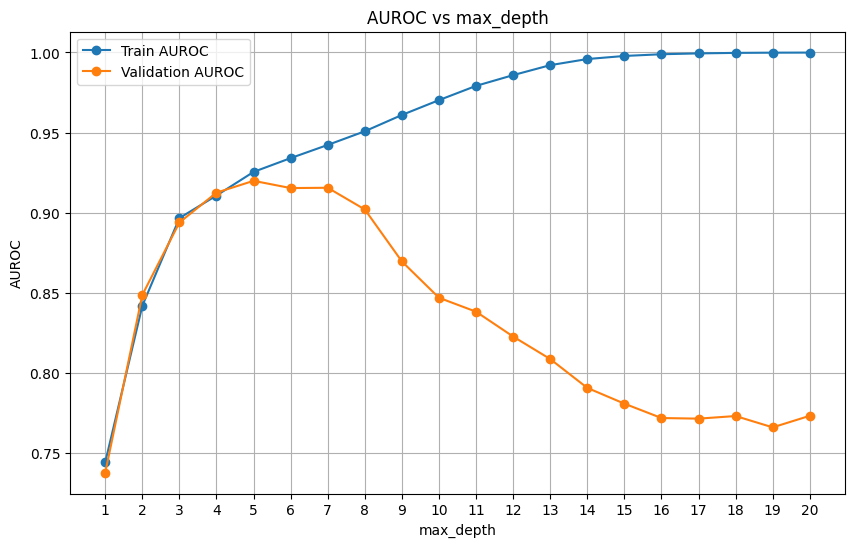

In [20]:
train_aucs = []
val_aucs = []
depths = list(range(1, 21))

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    train_probs = model.predict_proba(X_train)[:, 1]
    val_probs = model.predict_proba(X_val)[:, 1]

    train_auc = roc_auc_score(y_train, train_probs)
    val_auc = roc_auc_score(y_val, val_probs)

    train_aucs.append(train_auc)
    val_aucs.append(val_auc)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(depths, train_aucs, label='Train AUROC', marker='o')
plt.plot(depths, val_aucs, label='Validation AUROC', marker='o')
plt.xlabel('max_depth')
plt.ylabel('AUROC')
plt.title('AUROC vs max_depth')
plt.legend()
plt.grid(True)
plt.xticks(depths)
plt.show()


**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [64]:
# Натренуйте модель DecisionTree з найкращим значенням max_depth, яке ви знайшли на попередній ітерації.
# Нактраце значення max_depth = 5

final_model = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=25, random_state=42)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=25, random_state=42)

In [65]:
X_test = preprocess_new_data(test_df, input_cols, encoder, scaler)

In [66]:
submission_df = pd.read_csv('sample_submission.csv')

# Отримуємо ймовірності для класу 1 (Exited)
test_probs = final_model.predict_proba(X_test)[:, 1]

submission_df['Exited'] = (test_probs >= 0.45).astype(int)

In [67]:
submission_df.to_csv('submission_decision_tree.csv', index=False)
submission_df.head()

,id,Exited
0,15000,0
1,15001,0
2,15002,0
3,15003,1
4,15004,0


In [68]:
# from google.colab import files
files.download('submission_decision_tree.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf_model = RandomForestClassifier(max_depth=4,  random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [61]:
test_probs_rf = rf_model.predict_proba(X_test)[:, 1]

submission_df_rf = pd.read_csv('sample_submission.csv')
submission_df_rf['Exited'] = (test_probs >= 0.5).astype(int)

submission_df_rf.to_csv('submission_rf_depth4.csv', index=False)
submission_df_rf.head()

,id,Exited
0,15000,0
1,15001,0
2,15002,0
3,15003,1
4,15004,0


In [63]:
files.download('submission_rf_depth4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>